MovieWriter ffmpeg unavailable; using Pillow instead.


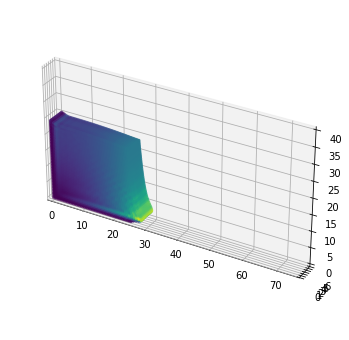

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import os

# Path to the folder containing your PNG images
image_folder = '.'

images = [img for img in os.listdir(image_folder) if img.startswith("p_")]

images.sort()

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(projection='3d')

def animate(i):
    ax.clear()
    p = np.loadtxt(images[i], skiprows=1)
    ax.set_xlim([0., 75.])
    ax.set_ylim([0., 6.])
    ax.set_zlim([0., 40.])
    ax.set_box_aspect((75., 6., 40.))
    quant = np.linalg.norm(p[:, 4:7], axis=1)
    # quant = p[:, 7]
    # quant = p[:, 5]
    points = ax.scatter(p[:, 1], p[:, 2], p[:, 3], s=5, c=quant)
    # ax.colorbar(location="bottom")
    return points

ani = FuncAnimation(fig, animate, frames=10)
ani.save("output-eos.gif")